# Preparing the Howell30 dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf

## Extract

In [2]:
horig = pd.read_excel("../datasets/raw/Howell/All_17996.xls")
print(horig.shape)

(3080, 19)


## Transform

In [3]:
cols = {"ageobs":"age", "wtkgs":"weight", "htcms":"height", "sex26":"sex"}
sex_replacements = {1:"M", 2:"F"}

howell = (horig
          .groupby("caseid")
          .tail(1)
          [ cols.keys() ]
          .dropna(subset=cols.keys())
          .rename(columns=cols)
          .replace(sex_replacements)
          .sort_values("age")
         )

# Filter only individuals aged 30 or less
howell = howell[ howell["age"] <= 30 ]
print(howell.shape)
howell

(270, 4)


,age,weight,height,sex
2543,0.205374,7.966209,67.9450,F
3052,0.367810,5.159609,56.5150,F
2965,0.400000,6.236890,60.9600,M
960,0.408061,9.752228,74.2950,M
2962,0.418810,4.847765,55.8800,F
...,...,...,...,...
983,29.505374,41.730464,161.9250,M
448,29.516123,55.111428,161.9250,M
1158,29.518810,49.044635,159.3850,M
3027,29.580613,42.977842,149.8600,F


## Load

In [4]:
howell.round(1).to_csv("../datasets/howell30.csv", index=False)

Intercept           64.704441
age                  7.104336
np.power(age, 2)    -0.137429
dtype: float64


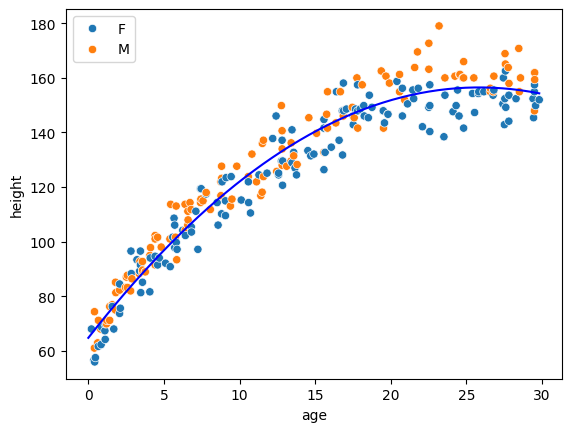

In [5]:
sns.scatterplot(data=howell, x="age", y="height", hue="sex")

formula = "height ~ 1 + age + np.power(age, 2)"
lmq = smf.ols(formula, data=howell).fit()
print(lmq.params)

int, blin, bquad = lmq.params.values
ages = np.linspace(0, howell["age"].max())
heighthats = int + blin*ages + bquad*ages**2
sns.lineplot(x=ages, y=heighthats, color="b");